In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Set visualization style
sns.set(style="whitegrid")

In [3]:
# Load the dataset
df = pd.read_csv("/content/healthcare_dataset.csv")

In [4]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328.0,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265.0,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205.0,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450.0,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458.0,Urgent,2022-10-09,Penicillin,Abnormal


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48501 entries, 0 to 48500
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                48501 non-null  object 
 1   Age                 48501 non-null  int64  
 2   Gender              48501 non-null  object 
 3   Blood Type          48501 non-null  object 
 4   Medical Condition   48501 non-null  object 
 5   Date of Admission   48501 non-null  object 
 6   Doctor              48501 non-null  object 
 7   Hospital            48500 non-null  object 
 8   Insurance Provider  48500 non-null  object 
 9   Billing Amount      48500 non-null  float64
 10  Room Number         48500 non-null  float64
 11  Admission Type      48500 non-null  object 
 12  Discharge Date      48500 non-null  object 
 13  Medication          48500 non-null  object 
 14  Test Results        48500 non-null  object 
dtypes: float64(2), int64(1), object(12)
memory usage: 5.6

In [7]:
df.describe(include='all')

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
count,48501,48501.000000,48501,48501,48501,48501,48501,48500,48500,48500.000000,48500.000000,48500,48500,48500,48500
unique,48493,NaN,2,8,6,1827,39316,38780,5,NaN,NaN,3,1856,5,3
top,ADAM OrR,NaN,Female,AB+,Arthritis,2024-03-16,Michael Smith,LLC Smith,Cigna,NaN,NaN,Elective,2020-09-03,Lipitor,Abnormal
freq,2,NaN,24283,6096,8176,45,22,37,9782,NaN,NaN,16330,45,9770,16260
mean,NaN,51.597988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25563.788862,301.097711,NaN,NaN,NaN,NaN
std,NaN,19.575619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14213.507307,115.170124,NaN,NaN,NaN,NaN
min,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2008.492140,101.000000,NaN,NaN,NaN,NaN
25%,NaN,35.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13250.792775,202.000000,NaN,NaN,NaN,NaN
50%,NaN,52.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25544.938022,302.000000,NaN,NaN,NaN,NaN
75%,NaN,69.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37850.164225,400.000000,NaN,NaN,NaN,NaN


In [8]:
print(df.isnull().sum())

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              1
Insurance Provider    1
Billing Amount        1
Room Number           1
Admission Type        1
Discharge Date        1
Medication            1
Test Results          1
dtype: int64


In [9]:
df.dropna(inplace=True)

In [10]:
print(df.isnull().sum())

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48500 entries, 0 to 48499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                48500 non-null  object 
 1   Age                 48500 non-null  int64  
 2   Gender              48500 non-null  object 
 3   Blood Type          48500 non-null  object 
 4   Medical Condition   48500 non-null  object 
 5   Date of Admission   48500 non-null  object 
 6   Doctor              48500 non-null  object 
 7   Hospital            48500 non-null  object 
 8   Insurance Provider  48500 non-null  object 
 9   Billing Amount      48500 non-null  float64
 10  Room Number         48500 non-null  float64
 11  Admission Type      48500 non-null  object 
 12  Discharge Date      48500 non-null  object 
 13  Medication          48500 non-null  object 
 14  Test Results        48500 non-null  object 
dtypes: float64(2), int64(1), object(12)
memory usage: 5.9+ MB


In [13]:
# Convert numerical columns
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Billing Amount'] = pd.to_numeric(df['Billing Amount'], errors='coerce')
df['Room Number'] = pd.to_numeric(df['Room Number'], errors='coerce')

# Convert datetime columns
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'], errors='coerce')
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'], errors='coerce')

# Convert categorical columns
for col in ['Gender', 'Blood Type', 'Medical Condition', 'Admission Type', 'Test Results']:
    if col in df.columns:
        df[col] = df[col].astype('category')

# Verify
print("Data Types After Correction:")
print(df.info())

Data Types After Correction:
<class 'pandas.core.frame.DataFrame'>
Index: 48500 entries, 0 to 48499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                48500 non-null  object        
 1   Age                 48500 non-null  int64         
 2   Gender              48500 non-null  category      
 3   Blood Type          48500 non-null  category      
 4   Medical Condition   48500 non-null  category      
 5   Date of Admission   48500 non-null  datetime64[ns]
 6   Doctor              48500 non-null  object        
 7   Hospital            48500 non-null  object        
 8   Insurance Provider  48500 non-null  object        
 9   Billing Amount      48500 non-null  float64       
 10  Room Number         48500 non-null  float64       
 11  Admission Type      48500 non-null  category      
 12  Discharge Date      48500 non-null  datetime64[ns]
 13  Medication          48

In [14]:
# Check for duplicate rows
print("Number of Duplicate Rows:", df.duplicated().sum())

# Drop duplicates if any
df.drop_duplicates(inplace=True)

# Verify
print("Number of Rows After Dropping Duplicates:", len(df))

Number of Duplicate Rows: 0
Number of Rows After Dropping Duplicates: 48500


In [15]:
# Standardize the Name column to title case
df['Name'] = df['Name'].str.title().str.strip()

# Verify the correction
print("Sample of Name column after cleaning:")
print(df['Name'].head(10))

Sample of Name column after cleaning:
0         Bobby Jackson
1          Leslie Terry
2           Danny Smith
3          Andrew Watts
4         Adrienne Bell
5         Emily Johnson
6        Edward Edwards
7    Christina Martinez
8       Jasmine Aguilar
9      Christopher Berg
Name: Name, dtype: object


Exploratory Data Analysis (EDA)

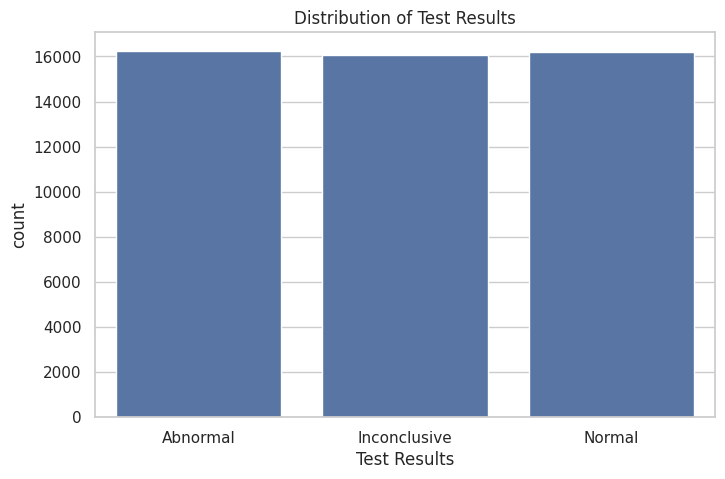

In [17]:
#Distribution of Test Results
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Test Results')
plt.title('Distribution of Test Results')
plt.show()

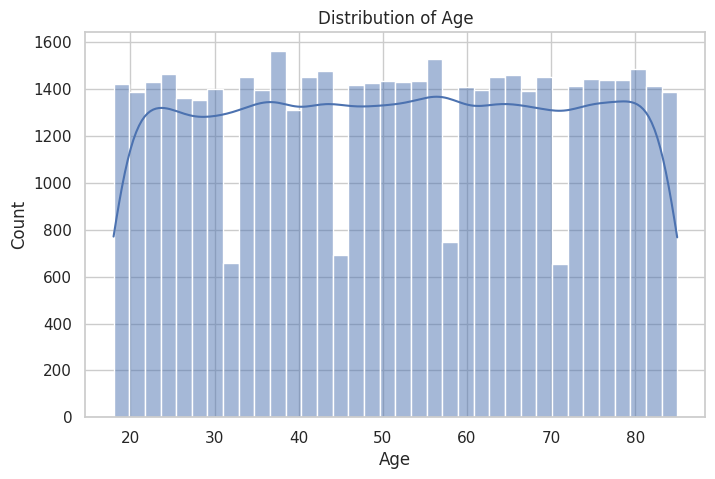

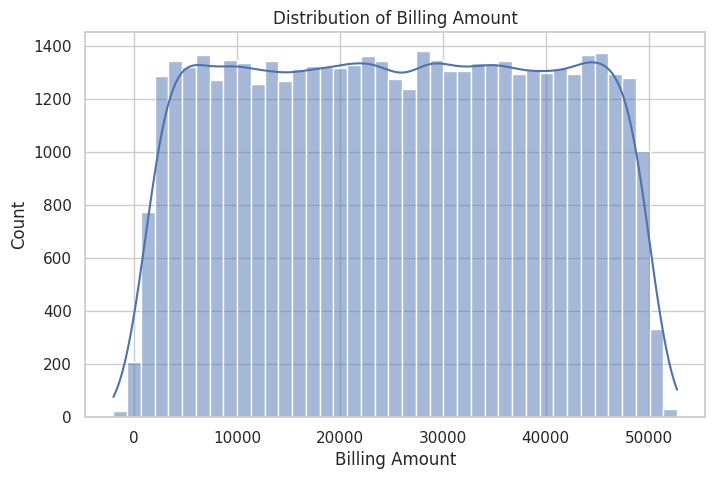

In [18]:
#Numerical Features Distribution
# Histograms for numerical columns
numerical_cols = ['Age', 'Billing Amount']
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

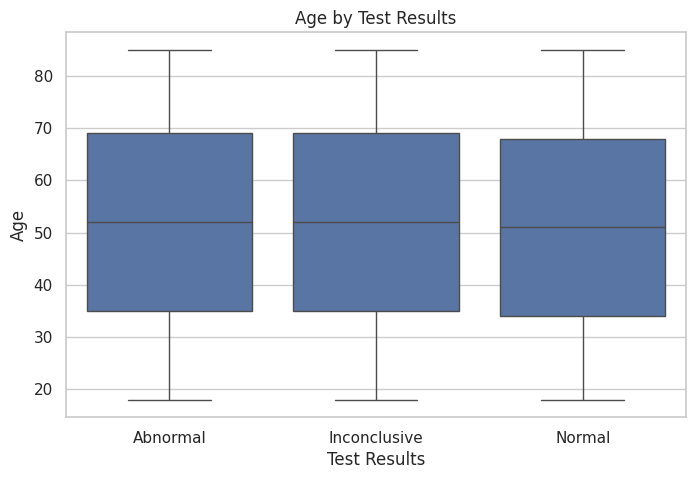

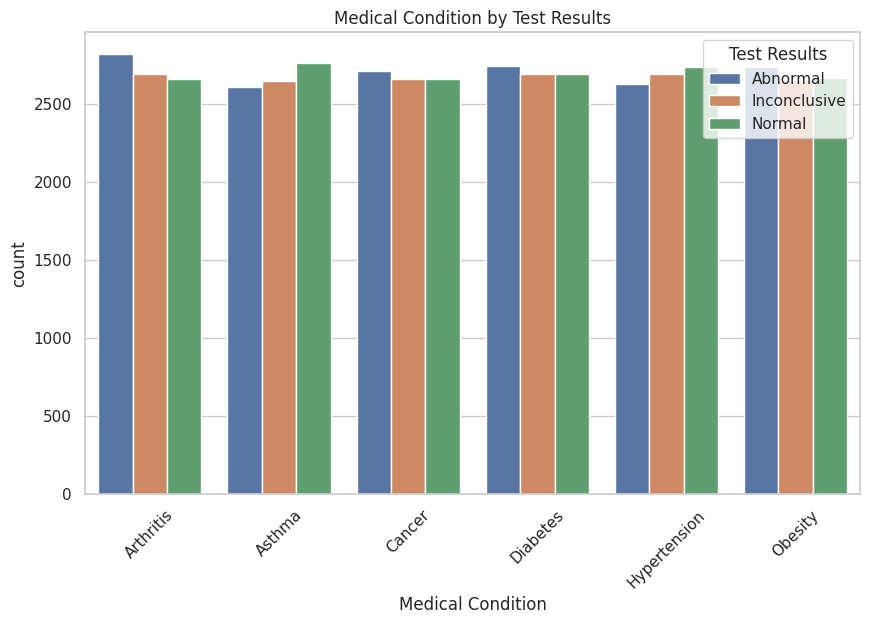

In [19]:
#Categorical Features vs. Test Results
# Boxplot of Age by Test Results
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Test Results', y='Age')
plt.title('Age by Test Results')
plt.show()

# Countplot of Medical Condition by Test Results
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Medical Condition', hue='Test Results')
plt.title('Medical Condition by Test Results')
plt.xticks(rotation=45)
plt.show()

**Encode Categorical Variables**

In [20]:
# Label encode the target variable (Test Results)
label_encoder = LabelEncoder()
df['Test Results'] = label_encoder.fit_transform(df['Test Results'])

# One-hot encode categorical features
categorical_cols = ['Gender', 'Blood Type', 'Medical Condition', 'Admission Type']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Drop irrelevant columns
drop_cols = ['Name', 'Doctor', 'Hospital', 'Insurance Provider', 'Room Number', 'Medication']
df_encoded.drop(columns=drop_cols, inplace=True, errors='ignore')

# Verify
print("Encoded Dataset Sample:")
print(df_encoded.head())

Encoded Dataset Sample:
   Age Date of Admission  Billing Amount Discharge Date  Test Results  \
0   30        2024-01-31    18856.281306     2024-02-02             2   
1   62        2019-08-20    33643.327287     2019-08-26             1   
2   76        2022-09-22    27955.096079     2022-10-07             2   
3   28        2020-11-18    37909.782410     2020-12-18             0   
4   43        2022-09-19    14238.317814     2022-10-09             0   

   Gender_Male  Blood Type_A-  Blood Type_AB+  Blood Type_AB-  Blood Type_B+  \
0         True          False           False           False          False   
1         True          False           False           False          False   
2        False           True           False           False          False   
3        False          False           False           False          False   
4        False          False            True           False          False   

   Blood Type_B-  Blood Type_O+  Blood Type_O-  Medical 

In [22]:
df_encoded['Length of Stay'] = (df_encoded['Discharge Date'] - df_encoded['Date of Admission']).dt.days
df_encoded.drop(columns=['Date of Admission', 'Discharge Date'], inplace=True)

**Split Features and Target**

In [23]:
X = df_encoded.drop(columns=['Test Results'])
y = df_encoded['Test Results']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
numerical_cols = ['Age', 'Billing Amount', 'Length of Stay']
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Verify
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (38800, 18)
Test set shape: (9700, 18)


**Build and Evaluate the Classification Model**

In [24]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred = rf_model.predict(X_test)

**Evaluate the Model**

Classification Report:
              precision    recall  f1-score   support

    Abnormal       0.34      0.34      0.34      3273
Inconclusive       0.33      0.34      0.33      3143
      Normal       0.34      0.32      0.33      3284

    accuracy                           0.33      9700
   macro avg       0.33      0.33      0.33      9700
weighted avg       0.33      0.33      0.33      9700



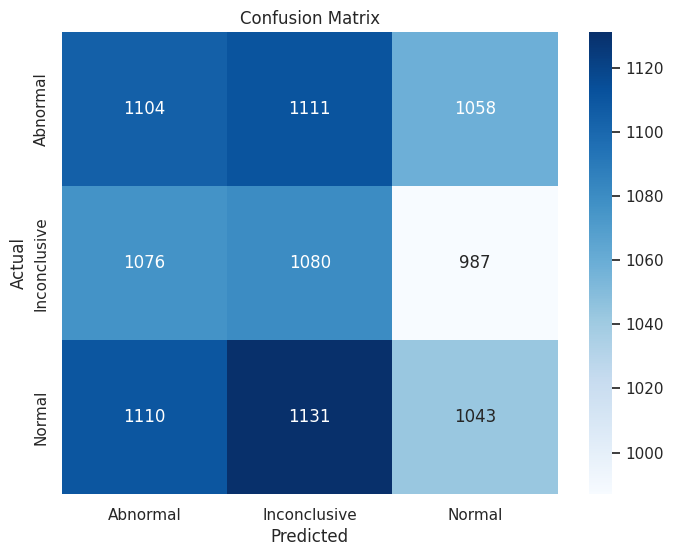

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

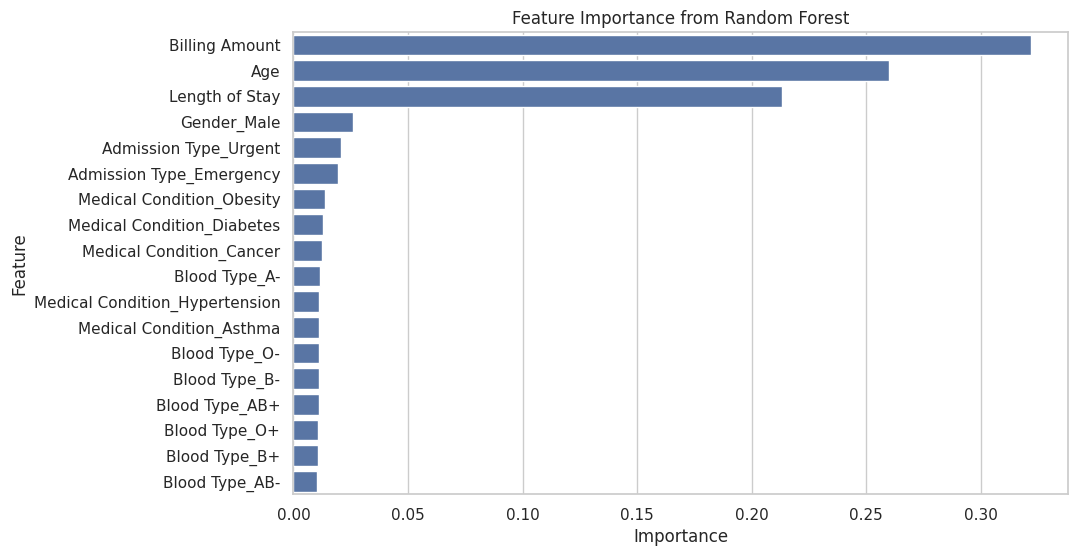

Top 10 Most Important Features:
                       Feature  Importance
1               Billing Amount    0.322115
0                          Age    0.259831
17              Length of Stay    0.213181
2                  Gender_Male    0.025931
16       Admission Type_Urgent    0.020789
15    Admission Type_Emergency    0.019446
14   Medical Condition_Obesity    0.013876
12  Medical Condition_Diabetes    0.012787
11    Medical Condition_Cancer    0.012306
3                Blood Type_A-    0.011602


In [26]:
# Get feature importance from the Random Forest model
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature')
plt.title('Feature Importance from Random Forest')
plt.show()

# Print top 10 features
print("Top 10 Most Important Features:")
print(feature_importance.head(10))

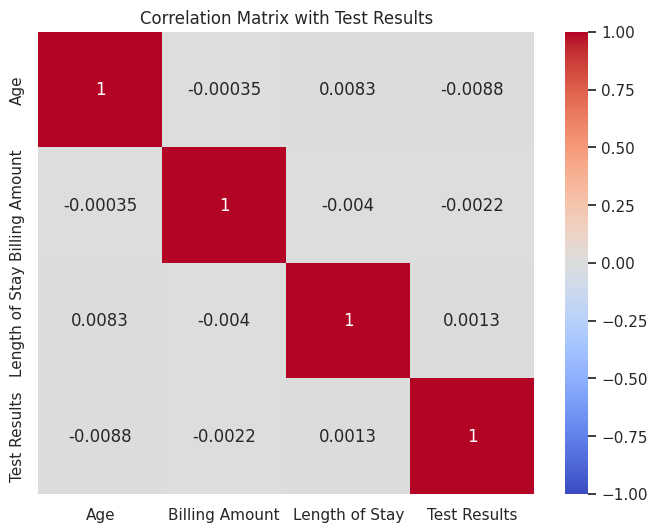

Correlation with Test Results:
Test Results      1.000000
Length of Stay    0.001339
Billing Amount   -0.002164
Age              -0.008825
Name: Test Results, dtype: float64


In [27]:
# Correlation with Test Results
numerical_cols = ['Age', 'Billing Amount', 'Length of Stay']
corr_matrix = df_encoded[numerical_cols + ['Test Results']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix with Test Results')
plt.show()

# Print correlations
print("Correlation with Test Results:")
print(corr_matrix['Test Results'].sort_values(ascending=False))

In [28]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize GridSearchCV
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Predict with best model
best_rf = grid_search.best_estimator_
y_pred_tuned = best_rf.predict(X_test)

# Evaluate
print("\nClassification Report with Tuned Model:")
print(classification_report(y_test, y_pred_tuned, target_names=label_encoder.classes_))

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Score: 0.3355411751205546

Classification Report with Tuned Model:
              precision    recall  f1-score   support

    Abnormal       0.34      0.40      0.37      3273
Inconclusive       0.33      0.31      0.32      3143
      Normal       0.35      0.31      0.33      3284

    accuracy                           0.34      9700
   macro avg       0.34      0.34      0.34      9700
weighted avg       0.34      0.34      0.34      9700



In [29]:
from xgboost import XGBClassifier

# Initialize and train XGBoost
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
print("\nClassification Report with XGBoost:")
print(classification_report(y_test, y_pred_xgb, target_names=label_encoder.classes_))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:11:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Classification Report with XGBoost:
              precision    recall  f1-score   support

    Abnormal       0.33      0.33      0.33      3273
Inconclusive       0.33      0.34      0.33      3143
      Normal       0.34      0.32      0.33      3284

    accuracy                           0.33      9700
   macro avg       0.33      0.33      0.33      9700
weighted avg       0.33      0.33      0.33      9700



In [30]:
# Add Age Group as a new feature
df_encoded['Age Group'] = pd.cut(df_encoded['Age'], bins=[0, 30, 50, 70, 100], labels=['0-30', '31-50', '51-70', '71+'])
df_encoded = pd.get_dummies(df_encoded, columns=['Age Group'], drop_first=True)

# Update X and re-split
X = df_encoded.drop(columns=['Test Results'])
y = df_encoded['Test Results']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features (including new dummy variables)
scaler = StandardScaler()
numerical_cols = ['Age', 'Billing Amount', 'Length of Stay']
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Re-run the best model (e.g., tuned Random Forest or XGBoost)
best_rf.fit(X_train, y_train)
y_pred_enhanced = best_rf.predict(X_test)
print("\nClassification Report with Enhanced Features:")
print(classification_report(y_test, y_pred_enhanced, target_names=label_encoder.classes_))


Classification Report with Enhanced Features:
              precision    recall  f1-score   support

    Abnormal       0.34      0.38      0.36      3273
Inconclusive       0.32      0.31      0.32      3143
      Normal       0.34      0.30      0.32      3284

    accuracy                           0.33      9700
   macro avg       0.33      0.33      0.33      9700
weighted avg       0.33      0.33      0.33      9700



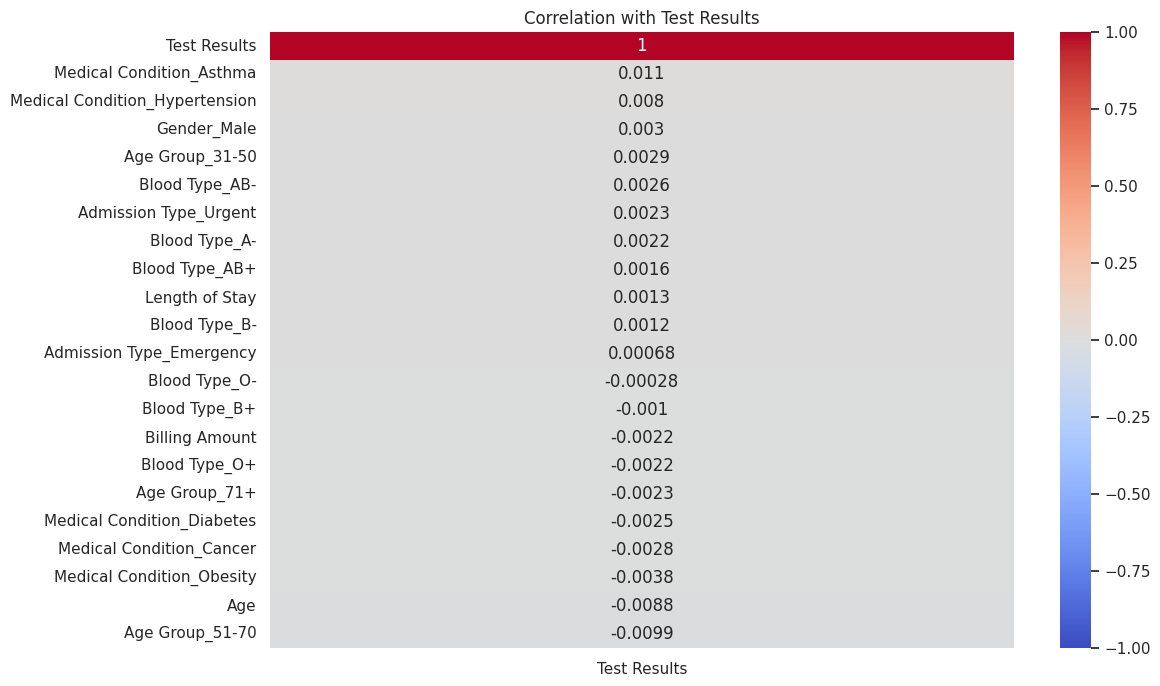


Classification Report with Interaction Term:
              precision    recall  f1-score   support

    Abnormal       0.33      0.37      0.35      3273
Inconclusive       0.32      0.32      0.32      3143
      Normal       0.34      0.31      0.32      3284

    accuracy                           0.33      9700
   macro avg       0.33      0.33      0.33      9700
weighted avg       0.33      0.33      0.33      9700



In [31]:
# Correlation with Test Results including Age Group dummies
corr_matrix = df_encoded.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix[['Test Results']].sort_values(by='Test Results', ascending=False), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation with Test Results')
plt.show()

# Add interaction term (e.g., Age * Medical Condition)
df_encoded['Age_Medical_Interaction'] = df_encoded['Age'] * df_encoded['Medical Condition_Obesity'].astype(float)  # Example with Obesity
X = df_encoded.drop(columns=['Test Results'])
y = df_encoded['Test Results']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
numerical_cols = ['Age', 'Billing Amount', 'Length of Stay', 'Age_Medical_Interaction']
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Re-run the best model (e.g., tuned Random Forest)
best_rf.fit(X_train, y_train)
y_pred_interaction = best_rf.predict(X_test)

print("\nClassification Report with Interaction Term:")
print(classification_report(y_test, y_pred_interaction, target_names=label_encoder.classes_))

In [32]:
from sklearn.model_selection import cross_val_score

# Initialize XGBoost
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# Perform 5-fold cross-validation
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())

# Train and predict
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("\nClassification Report with XGBoost and Cross-Validation:")
print(classification_report(y_test, y_pred_xgb, target_names=label_encoder.classes_))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:18:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:19:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:19:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:19:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:19:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Cross-Validation Scores: [0.33311856 0.3367268  0.33943299 0.34072165 0.33311856]
Mean CV Score: 0.3366237113402062
Standard Deviation: 0.0031390440613825025


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:19:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Classification Report with XGBoost and Cross-Validation:
              precision    recall  f1-score   support

    Abnormal       0.33      0.34      0.33      3273
Inconclusive       0.33      0.34      0.33      3143
      Normal       0.34      0.32      0.33      3284

    accuracy                           0.33      9700
   macro avg       0.33      0.33      0.33      9700
weighted avg       0.33      0.33      0.33      9700



In [33]:
df_encoded.to_csv("/content/healthcare_dataset.csv", index=False)
print("Cleaned dataset saved as 'healthcare_data_cleaned.csv'")

Cleaned dataset saved as 'healthcare_data_cleaned.csv'


**Conclusion and Reflection**
It’s reasonable to conclude that the synthetic dataset lacks sufficient predictive power for Test Results.